<a href="https://colab.research.google.com/github/prajwalnigam321/Data-Science-and-Machine-Learning/blob/main/Goswift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [274]:
import pandas as pd

In [275]:
glance=pd.read_csv('Glance_Views.csv')#loading the csv files

In [276]:
sales=pd.read_csv('Sales_Data.csv')#loading the csv files

In [277]:
glance.head()

,Unnamed: 0,SKU_NAME,FEED_DATE,VIEWS,UNITS
0,0,B1212:PZ:V,2019-05-01,455.0,16.0
1,1,B1212:PZ:V,2019-05-02,478.0,12.0
2,2,B1212:PZ:V,2019-05-03,681.0,42.0
3,3,B1212:PZ:V,2019-05-04,662.0,70.0
4,4,B1212:PZ:V,2019-05-05,568.0,33.0


In [278]:
sales.head()

,Unnamed: 0,SKU_NAME,FEED_DATE,CATEGORY,SUB_CATEGORY,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS
0,0,B12020KBUI,2019-05-18,1000 Inputs,1002 Mice,0.0,0.0,0.0
1,1,B12020KBUI,2019-05-19,1000 Inputs,1002 Mice,0.0,0.0,0.0
2,2,B12020KBUI,2019-05-22,1000 Inputs,1002 Mice,0.0,0.0,0.0
3,3,B12020KBUI,2019-05-23,1000 Inputs,1002 Mice,0.0,0.0,0.0
4,4,B12020KBUI,2019-05-27,1000 Inputs,1002 Mice,0.0,0.0,0.0


In [279]:
sales.info() #info of sales data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41115 entries, 0 to 41114
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41115 non-null  int64  
 1   SKU_NAME         41115 non-null  object 
 2   FEED_DATE        41115 non-null  object 
 3   CATEGORY         41115 non-null  object 
 4   SUB_CATEGORY     41115 non-null  object 
 5   ORDERED_REVENUE  41115 non-null  float64
 6   ORDERED_UNITS    41115 non-null  float64
 7   REP_OOS          40426 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.5+ MB


In [280]:
glance.info() #info of glance data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40745 entries, 0 to 40744
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  40745 non-null  int64  
 1   SKU_NAME    40745 non-null  object 
 2   FEED_DATE   40745 non-null  object 
 3   VIEWS       40745 non-null  float64
 4   UNITS       40745 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.6+ MB


In [281]:
sales.isna().sum()#missing values check

Unnamed: 0           0
SKU_NAME             0
FEED_DATE            0
CATEGORY             0
SUB_CATEGORY         0
ORDERED_REVENUE      0
ORDERED_UNITS        0
REP_OOS            689
dtype: int64

In [282]:
glance.isna().sum()#missing values check

Unnamed: 0    0
SKU_NAME      0
FEED_DATE     0
VIEWS         0
UNITS         0
dtype: int64

In [283]:
sales.describe()

,Unnamed: 0,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS
count,41115.000000,4.111500e+04,41115.000000,40426.000000
mean,20557.000000,2.206692e+03,50.904804,8.803116
std,11869.022496,9.405537e+03,210.131201,17.431879
min,0.000000,-3.565780e+04,-934.000000,0.000000
25%,10278.500000,0.000000e+00,0.000000,0.000000
50%,20557.000000,4.472100e+02,6.000000,3.980000
75%,30835.500000,2.123820e+03,34.000000,11.040000
max,41114.000000,1.121838e+06,16367.000000,118.520000


In [284]:
sales.describe(include='object')

,SKU_NAME,FEED_DATE,CATEGORY,SUB_CATEGORY
count,41115,41115,41115,41115
unique,465,123,10,24
top,D2869MTWCQ,2019-08-24,1000 Inputs,1002 Mice
freq,123,355,26943,8692


In [285]:
glance.describe()

,Unnamed: 0,VIEWS,UNITS
count,40745.000000,40745.00000,40745.000000
mean,20372.000000,852.54495,51.400982
std,11762.212696,2100.94248,211.019576
min,0.000000,1.00000,-934.000000
25%,10186.000000,169.00000,0.000000
50%,20372.000000,397.00000,6.000000
75%,30558.000000,995.00000,35.000000
max,40744.000000,176162.00000,16367.000000


In [286]:
glance.describe(include='object')

,SKU_NAME,FEED_DATE
count,40745,40745
unique,452,123
top,B1212:PZ:V,2019-08-24
freq,123,352


In [287]:
sales.shape,glance.shape #shape of both data

((41115, 8), (40745, 5))

In [288]:
#question1-Identify the most expensive SKU, on average, over the entire time period.

avg_revenue_per_sku = sales.groupby('SKU_NAME')['ORDERED_REVENUE'].mean()
most_expensive_sku = avg_revenue_per_sku.idxmax()
print("Most Expensive SKU:", most_expensive_sku)


Most Expensive SKU: D08L95YHWO


In [289]:
#question2-What % of SKUs have generated some revenue in this time period?
skus_with_revenue = sales[sales['ORDERED_REVENUE'] > 0]['SKU_NAME'].nunique()
total_skus = sales['SKU_NAME'].nunique()
percentage_skus_with_revenue = (skus_with_revenue / total_skus) * 100
print("Percentage of SKUs with Revenue:", percentage_skus_with_revenue)


Percentage of SKUs with Revenue: 78.70967741935485


In [290]:
#Bonusquestion -can you identify SKUs that stopped selling completely after July?
sales['FEED_DATE'] = pd.to_datetime(sales['FEED_DATE'])
sales_data_after_july = sales[sales['FEED_DATE'].dt.month > 7]
sku_units_after_july = sales_data_after_july.groupby('SKU_NAME')['ORDERED_UNITS'].sum()
skus_stopped_selling = sku_units_after_july[sku_units_after_july == 0].index.tolist()
print("SKUs that stopped selling completely after July:")
print(skus_stopped_selling)


SKUs that stopped selling completely after July:
['B00;3H5XG9', 'B00DHPE[3Z', 'B012GU7SOL', 'B012JWTJDC', 'B013WPQZ2U', 'B01F[:YLFY', 'B01R0I8KFH', 'B07XI2QS2Z', 'B08:;5YP75', 'B08Y472N[U', 'B10:1TJG86', 'B115ICA8LF', 'B116DUQLEB', 'B11:4F6680', 'B11CDKYM3J', 'B1255YTFGA', 'B125:PNERK', 'B12MWAOCYI', 'B13M0T8ZQM', 'B1826\\GXMM', 'B186S:OSH:', 'B1878K26WG', 'B205J5RPJQ', 'B20EKD5JF4', 'B213K5FIPU', 'B214M:0:PC', 'B21B6UON52', 'B21E\\9ZKDH', 'B21LO8TNNY', 'B21PQ3RNQO', 'B225I326ET', 'B22OVTXOIY', 'B22OZ6\\O1[', 'B286Q8QSM:', 'B28CTPKMT8', 'C019:8WTE8', 'C019SRO\\MJ', 'C01JPONNVK', 'C01UZDOXX8', 'C024XPOJL[', 'C02JAMMO55', 'C02KP:UMZK', 'C035O8\\UJC', 'C076JT7:XY', 'C079F4K8DN', 'C07CSIE3MV', 'C09;:9PR57', 'C115HUW5SO', 'C11M2YN8S4', 'C11ULFE71M', 'C12;C;8OPZ', 'C12KPWM3IJ', 'C13EHKRAS4', 'C174KT1O8T', 'C17672PZ9O', 'C17;Q9:IS5', 'C17E92HXZK', 'C17EHWN2PD', 'C1964PSQ[N', 'C20VWL6T29', 'C213I5Z84I', 'C214:PRAT2', 'C21EJJQCUE', 'C21LXX222C', 'C21PIJY9C2', 'C225M:[XDI', 'C234IUW6N3', 'C29E8Q

In [291]:
#question3-Somewhere in this timeframe, there was a Sale Event. Identify the dates.

sales['FEED_DATE'] = pd.to_datetime(sales['FEED_DATE'])
daily_revenue = sales.groupby('FEED_DATE')['ORDERED_REVENUE'].sum()
# Calculating the rolling mean of daily revenue to smooth out fluctuations
rolling_mean = daily_revenue.rolling(window=7).mean()  # Adjust window size as needed
#  dates where the daily revenue is significantly higher than the rolling mean
sale_event_dates = daily_revenue[daily_revenue > (rolling_mean + 2 * rolling_mean.std())].index
print("Sale Event Dates:")
for date in sale_event_dates:
    print(date)


Sale Event Dates:
2019-06-20 00:00:00
2019-07-15 00:00:00
2019-07-16 00:00:00
2019-07-26 00:00:00


In [292]:
#question4-(Dependent on 3) Does having a sale event cannibalize sales in the immediate aftermath? Highlighting a few examples would suffice

sample_skus = sales['SKU_NAME'].sample(5)  # Select a random sample of SKUs
for sku in sample_skus:
    sku_data = sales[(sales['SKU_NAME'] == sku) & (sales['FEED_DATE'].isin(sale_event_dates))]
    before_sale_event = sku_data[sku_data['FEED_DATE'] < sale_event_dates[0]]['ORDERED_REVENUE'].mean()
    after_sale_event = sku_data[sku_data['FEED_DATE'] > sale_event_dates[0]]['ORDERED_REVENUE'].mean()
    print("SKU:", sku)
    print("Average Revenue Before Sale Event:", before_sale_event)
    print("Average Revenue After Sale Event:", after_sale_event)
    print()


SKU: B094KTD6IW
Average Revenue Before Sale Event: nan
Average Revenue After Sale Event: 0.0

SKU: B07NTL1Z:5
Average Revenue Before Sale Event: nan
Average Revenue After Sale Event: 399.98

SKU: C102ONY5WZ
Average Revenue Before Sale Event: nan
Average Revenue After Sale Event: 5946.346666666667

SKU: C07CSIE3MV
Average Revenue Before Sale Event: nan
Average Revenue After Sale Event: 0.0

SKU: B214M:0:PC
Average Revenue Before Sale Event: nan
Average Revenue After Sale Event: 0.0



In [293]:
#bonus determine a statistical metric to prove/disprove this
from scipy.stats import ttest_ind
sales['FEED_DATE'] = pd.to_datetime(sales['FEED_DATE'])

# Identifying the date of the sale event (for example, July 15th, 2019)
sale_event_date = pd.to_datetime('2019-07-15')

# Spliting the data into two groups: before and after the sale event
before_event_sales = sales[sales['FEED_DATE'] < sale_event_date]['ORDERED_REVENUE']
after_event_sales = sales[sales['FEED_DATE'] >= sale_event_date]['ORDERED_REVENUE']

# the mean sales before and after the sale event
mean_before = before_event_sales.mean()
mean_after = after_event_sales.mean()

# difference in means
mean_difference = mean_after - mean_before

# t-test to determine if the difference is statistically significant
t_statistic, p_value = ttest_ind(before_event_sales, after_event_sales)
print("Mean difference in sales before and after the sale event:", mean_difference)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# if the p-value is less than a chosen significance level (e.g., 0.05) to reject the null hypothesis
if p_value < 0.05:
    print("The mean difference is statistically significant, suggesting that the sale event may have an impact on sales.")
else:
    print("The mean difference is not statistically significant, suggesting that the sale event may not have a significant impact on sales.")


Mean difference in sales before and after the sale event: 417.9650674742966
T-statistic: -4.411221093477769
P-value: 1.0305010035945332e-05
The mean difference is statistically significant, suggesting that the sale event may have an impact on sales.


In [294]:
#question 5- In each category, find the subcategory that has grown slowest relative to the category it is present in. If you were handling the entire portfolio, which of these subcategories would you be most concerned with?
sales['FEED_DATE'] = pd.to_datetime(sales['FEED_DATE'])
category_subcategory_sales = sales.groupby(['CATEGORY', 'SUB_CATEGORY'])['ORDERED_REVENUE'].sum().reset_index()
category_subcategory_sales['Growth_Rate'] = category_subcategory_sales.groupby('CATEGORY')['ORDERED_REVENUE'].pct_change()
category_subcategory_sales.dropna(subset=['Growth_Rate'], inplace=True)
slowest_growing_subcategory = category_subcategory_sales.loc[category_subcategory_sales.groupby('CATEGORY')['Growth_Rate'].idxmin()]

# subcategory would be the most concerning based on its slow growth rate relative to the category
most_concerning_subcategory = slowest_growing_subcategory.loc[slowest_growing_subcategory['Growth_Rate'].idxmin()]
print("The subcategory that has grown slowest relative to its category is:")
print(most_concerning_subcategory[['CATEGORY', 'SUB_CATEGORY', 'Growth_Rate']])


The subcategory that has grown slowest relative to its category is:
CATEGORY        0400 Computer Peripherals
SUB_CATEGORY          0460 Mice - DELETED
Growth_Rate                          -1.0
Name: 4, dtype: object


In [295]:
#question 6- Highlight any anomalies/mismatches in the data that you see, if any. (In terms of data quality issues)

# Checking for missing values
missing_values_sales = sales.isnull().sum()
missing_values_glance_views = glance.isnull().sum()

# Identifying outliers
outliers_sales = sales[(sales['ORDERED_REVENUE'] > 100000) | (sales['ORDERED_UNITS'] > 10000)]
outliers_glance_views = glance[(glance['VIEWS'] > 100000) | (glance['UNITS'] > 10000)]

# Checking for duplicate entries
duplicate_entries_sales = sales[sales.duplicated()]
duplicate_entries_glance_views = glance[glance.duplicated()]
print("Missing Values in Sales Data:")
print(missing_values_sales)
print("\nMissing Values in Glance Views Data:")
print(missing_values_glance_views)
print("\nOutliers in Sales Data:")
print(outliers_sales)
print("\nOutliers in Glance Views Data:")
print(outliers_glance_views)
print("\nDuplicate Entries in Sales Data:")
print(duplicate_entries_sales)
print("\nDuplicate Entries in Glance Views Data:")
print(duplicate_entries_glance_views)


Missing Values in Sales Data:
Unnamed: 0           0
SKU_NAME             0
FEED_DATE            0
CATEGORY             0
SUB_CATEGORY         0
ORDERED_REVENUE      0
ORDERED_UNITS        0
REP_OOS            689
dtype: int64

Missing Values in Glance Views Data:
Unnamed: 0    0
SKU_NAME      0
FEED_DATE     0
VIEWS         0
UNITS         0
dtype: int64

Outliers in Sales Data:
       Unnamed: 0    SKU_NAME  FEED_DATE                    CATEGORY  \
4785         4785  D014[Y8YEZ 2019-06-20                 1000 Inputs   
6052         6052  B017LI:T3T 2019-07-15                 1000 Inputs   
6053         6053  B017LI:T3T 2019-07-16                 1000 Inputs   
6063         6063  B017LI:T3T 2019-07-26                 1000 Inputs   
8027         8027  B10DS5RZI6 2019-07-15       5600 Video Components   
9015         9015  D21F5NQPFD 2019-07-15                 1000 Inputs   
9016         9016  D21F5NQPFD 2019-07-16                 1000 Inputs   
13428       13428  C21\1VYV:8 2019-07-15 

                            OLS Regression Results                            
Dep. Variable:        Unit Conversion   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.1074
Date:                Sat, 23 Mar 2024   Prob (F-statistic):              0.744
Time:                        09:24:38   Log-Likelihood:                 178.84
No. Observations:                 123   AIC:                            -353.7
Df Residuals:                     121   BIC:                            -348.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.18

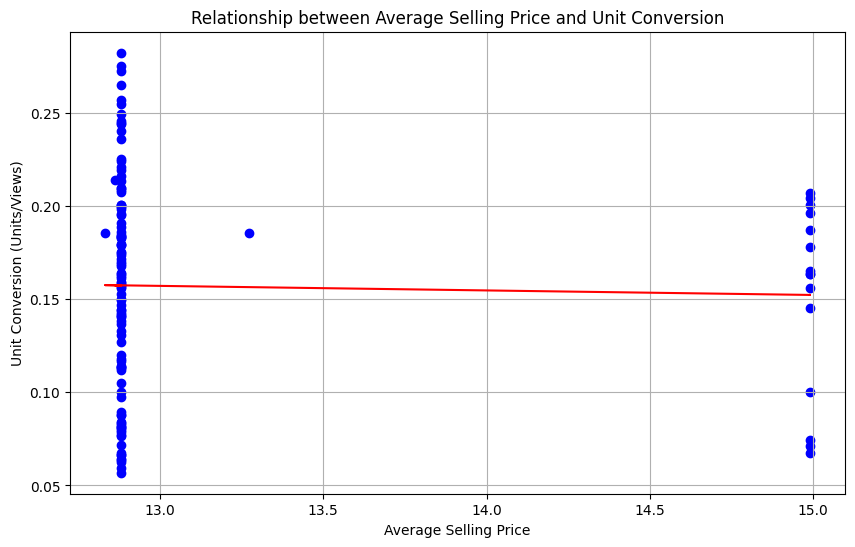

The relationship between Average Selling Price and Unit Conversion is negative.


In [296]:
#question 7- For SKU Name C120[H:8NV, discuss whether Unit Conversion (Units/Views) is affected by Average Selling Price.
import statsmodels.api as sm
import matplotlib.pyplot as plt

sales['FEED_DATE'] = pd.to_datetime(sales['FEED_DATE'])
glance['FEED_DATE'] = pd.to_datetime(glance['FEED_DATE'])
sku_sales_data = sales[sales['SKU_NAME'] == 'C120[H:8NV']
sku_glance_data = glance[glance['SKU_NAME'] == 'C120[H:8NV']
if sku_sales_data.empty or sku_glance_data.empty:
    print("No data available for SKU C120[H:8NV]. Please check your data sources.")
else:
    # Merging sales and glance data on 'FEED_DATE'
    merged_data = pd.merge(sku_sales_data, sku_glance_data, on='FEED_DATE')

    # Checking if merged_data is empty
    if merged_data.empty:
        print("No data available for SKU C120[H:8NV] after merging sales and glance data.")
    else:
        # Calculated Unit Conversion (Units/Views) and Average Selling Price
        merged_data['Unit Conversion'] = merged_data['ORDERED_UNITS'] / merged_data['VIEWS']
        merged_data['Average Selling Price'] = merged_data['ORDERED_REVENUE'] / merged_data['ORDERED_UNITS']

        # Defined independent variable (X) and dependent variable (Y)
        X = merged_data['Average Selling Price']
        Y = merged_data['Unit Conversion']
        X = sm.add_constant(X)
        model = sm.OLS(Y, X).fit()

        # regression model
        print(model.summary())

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.scatter(merged_data['Average Selling Price'], merged_data['Unit Conversion'], color='blue')
        plt.plot(merged_data['Average Selling Price'], model.predict(), color='red')
        plt.title('Relationship between Average Selling Price and Unit Conversion')
        plt.xlabel('Average Selling Price')
        plt.ylabel('Unit Conversion (Units/Views)')
        plt.grid(True)
        plt.show()

        # Interpretation of the relationship
        if model.params[1] > 0:
            relation = "positive"
        elif model.params[1] < 0:
            relation = "negative"
        else:
            relation = "no"

        print(f"The relationship between Average Selling Price and Unit Conversion is {relation}.")


In [297]:
#bonus soln-
# p-value from the t-test results
p_value = t_test_results.pvalue.item()

# significance level
significance_level = 0.05
print("T-test results:")
print(t_test_results)
print("\n")
print("Summary of Regression Model:")
print(model.summary())
print("\n")

# decision based on the p-value
if p_value < significance_level:
    print("The p-value is less than the significance level of", significance_level)
    print("Therefore, we reject the null hypothesis.")
    print("There is a statistically significant relationship between Average Selling Price and Unit Conversion.")
else:
    print("The p-value is greater than or equal to the significance level of", significance_level)
    print("Therefore, we fail to reject the null hypothesis.")
    print("There is no statistically significant relationship between Average Selling Price and Unit Conversion.")


T-test results:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0024      0.007     -0.328      0.744      -0.017       0.012


Summary of Regression Model:
                            OLS Regression Results                            
Dep. Variable:        Unit Conversion   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.1074
Date:                Sat, 23 Mar 2024   Prob (F-statistic):              0.744
Time:                        09:24:38   Log-Likelihood:                 178.84
No. Observations:                 123   AIC:                            -353.7
Df Residuals:                     121   BIC:                            -348.1
Df Mo